In [1]:
import os, sys
import general_config 
print(general_config.ROOTDIR)
sys.path.append(general_config.ROOTDIR)

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize, rotate

from pipeline.objgen.cellsX import CCellX, CCellMX, CCellPX, RCellX, CCellTX, CCellTsX

D:/Desktop@D/xai_basic


In [2]:
def create_multi_axes_figures(settings, figsize=(12,12)):
    fig = plt.figure(figsize=figsize)
    for axpos, img, title, is_heatmap in settings:
        if not is_heatmap:
            vmin, vmax = 0.,1.
            cmap=None
        else:
            vmin, vmax = -1.,1.
            cmap = 'bwr'
        fig.add_subplot(*axpos)
        ax = plt.gca()
        cax = ax.imshow(img, vmin=vmin, vmax=vmax, cmap=cmap)
        if title is not None:
            ax.set_title(title)
        
        ax.set_xlim(0,512)
        ax.set_ylim(0,512)
        if is_heatmap:
            plt.colorbar(cax,fraction=0.04)
    plt.tight_layout()

In [3]:
color_setting = {
    'border': np.array([0.8,0.8,0.8]),
    'inner': np.array([0.2,0.2,0.4])
}
shape_setting = {
    'radius': 100,
    'vertical_stretch':1.5, # to roughly make ellipse
    'thickness': 20,
    'd_noise':5.,
    'noise_roughness': 32 # 1 is very fine, pixel level noise
}
explanation_setting = {
    'localization_threshold' : 0.05,
    'localization_value' : 0.4,
    'discriminative_feature_threshold' : 0.05,
    'discriminative_feature_value' : 0.9
}
c = CCellX()
c.setup_explanation_attributes(explanation_setting)
c.setup_basic_ball(color_setting, shape_setting)
circ, explanation = c.make_basic_ball(centerpos=(100,0))
""" 
From pipeline.objgen.baseclass, make_explanation(), see the tips
    "1. During implementation of objects derived from this class, initiate self.parts.
    make_explanation() will then manipulate items stored in self.parts."   
Hence, if make_explanation() is not yet implemented, observed the c.parts that has been initiated. 
"""
print('parts of c, a CCellX() object')
for part_name, this_part in c.parts.items():
    if isinstance(this_part, np.ndarray):
        print(' %-16s %s'%(str(part_name),str(this_part.shape)))        
    else:
        print(' %-16s [%s]'%(str(part_name),str(type(this_part))))

c2 = CCellX()
c2.setup_explanation_attributes(explanation_setting)
c2.setup_basic_ball(color_setting, shape_setting)
shape_setting['thickness'] = 0
shape_setting['vertical_stretch'] = 1.
circ_without_border, ex2 = c2.make_basic_ball(centerpos=(0,0))

parts of c, a CCellX() object
 xyd              [<class 'tuple'>]
 centerpos        [<class 'tuple'>]
 noise            (512, 512)
 border           (512, 512, 3)
 inner_ball       (512, 512, 3)
 ball             (512, 512, 3)


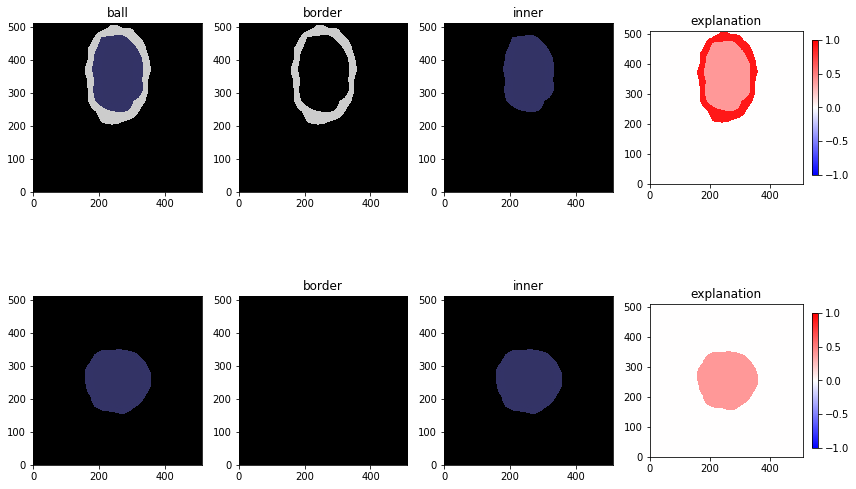

In [4]:
fig_settings = []
fig_layout = (2,4)
fig_settings.append((fig_layout+(1,), circ, 'ball', False))
fig_settings.append((fig_layout+(2,), c.parts['border'], 'border', False))
fig_settings.append((fig_layout+(3,), c.parts['inner_ball'], 'inner', False))
fig_settings.append((fig_layout+(4,), explanation, 'explanation', True))

fig_settings.append((fig_layout+(5,), circ_without_border, None, False))
fig_settings.append((fig_layout+(6,), c2.parts['border'], 'border', False))
fig_settings.append((fig_layout+(7,), c2.parts['inner_ball'], 'inner', False))
fig_settings.append((fig_layout+(8,), ex2, 'explanation', True))

create_multi_axes_figures(fig_settings, figsize=(12,8))

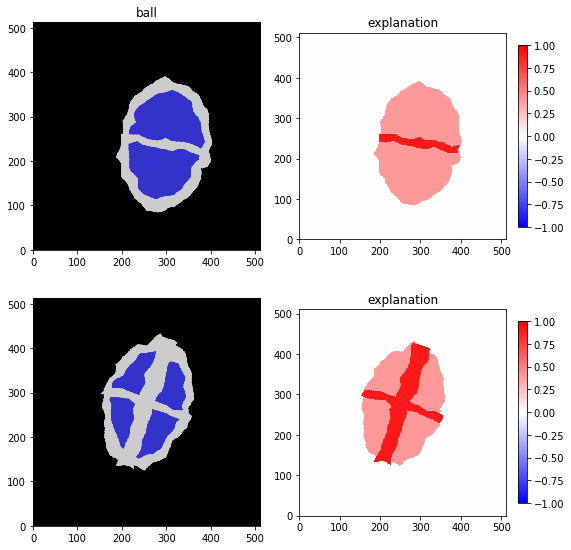

In [5]:
color_setting = {
    'border': np.array([0.8,0.8,0.8]),
    'inner': np.array([0.2,0.2,0.8]),
    'bar': np.array([0.8,0.8,0.8])
} 
shape_setting = {
    'radius': 100,
    'thickness': 20,
    'bar_thickness':20,
    'pole_thickness':40,
    'd_noise':5.,
    'noise_roughness': 20 # 1 is very fine, pixel level noise
} 
shape_setting['vertical_stretch'] = 1.5

cm = CCellMX()
cm.setup_explanation_attributes(explanation_setting)
cm.setup_ccell(color_setting, shape_setting) 
circ, exm = cm.make_ccell(centerpos=(-20,40),rotate_angle=np.random.uniform(-45,45))

cp = CCellPX()
cp.setup_explanation_attributes(explanation_setting)
cp.setup_ccell(color_setting, shape_setting) 
circp, exp = cp.make_ccell(centerpos=(20,0), rotate_angle=np.random.uniform(-45,45))

fig_settings = []
fig_layout = (2,2)
fig_settings.append((fig_layout+(1,), circ, 'ball', False))
fig_settings.append((fig_layout+(2,), exm, 'explanation', True))

fig_settings.append((fig_layout+(3,), circp, None, False))
fig_settings.append((fig_layout+(4,), exp, 'explanation', True))

create_multi_axes_figures(fig_settings, figsize=(8,8))

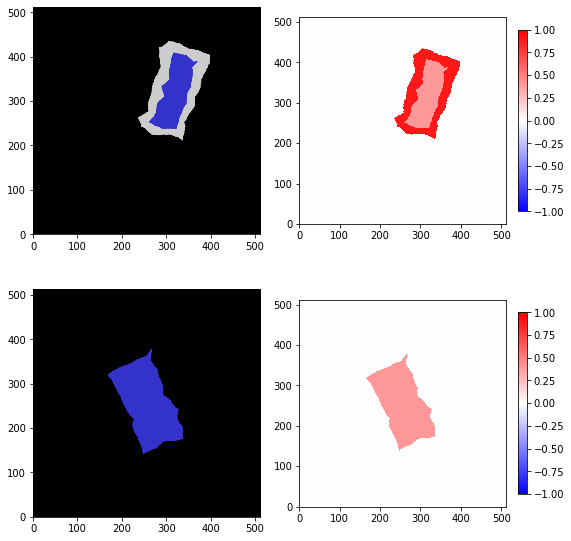

In [6]:
color_setting = {
    'border': np.array([0.8,0.8,0.8]),
    'inner': np.array([0.2,0.2,0.8])
}

shape_setting = {
    'h':200,
    'w':100,
    'thickness': 20, # border thickness
    'd_noise':5,
    'noise_roughness': 20 # 1 is very fine, pixel level noise
}
cr = RCellX()
cr.setup_explanation_attributes(explanation_setting)
cr.setup_rectangle(color_setting, shape_setting) 
rect, expr = cr.make_basic_rect(centerpos=(40,80), 
                                       rotate_angle=np.random.uniform(-45,45))

cr2 = RCellX()
cr2.setup_explanation_attributes(explanation_setting)
shape_setting['thickness'] = 0
cr2.setup_rectangle(color_setting, shape_setting) 
rect2, expr2 = cr2.make_basic_rect(centerpos=(0,0), 
                                        rotate_angle=np.random.uniform(-45,45))
fig_settings = []
fig_layout = (2,2)
fig_settings.append((fig_layout+(1,), rect,'',False))
fig_settings.append((fig_layout+(2,), expr,'',True))
fig_settings.append((fig_layout+(3,), rect2,'',False))
fig_settings.append((fig_layout+(4,), expr2,'',True))
create_multi_axes_figures(fig_settings,figsize=(8,8))

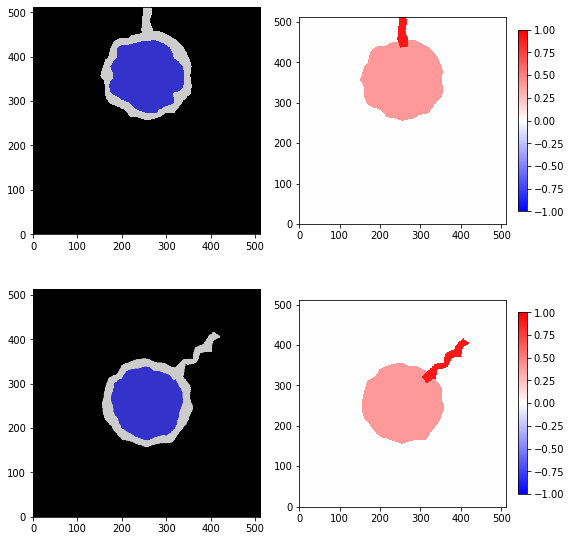

In [7]:
color_setting = {
    'border': np.array([0.8,0.8,0.8]),
    'inner': np.array([0.2,0.2,0.8]),
    'tail': np.array([0.8,0.8,0.8])
}
shape_setting = {
    'radius': 100,
    'vertical_stretch':1.0, # to roughly make ellipse
    'thickness': 20,
    'tail_thickness':20,
    'tail_ratio_to_radius':2.,
    'd_noise':5.,
    'noise_roughness': 20 # 1 is very fine, pixel level noise
}    
ct = CCellTX()
ct.setup_basic_ball(color_setting, shape_setting)
ct.setup_explanation_attributes(explanation_setting)
ctail,exp = ct.make_tcell(centerpos=(100,0))

ct2 = CCellTX()
ct2.setup_basic_ball(color_setting, shape_setting)
ct2.setup_explanation_attributes(explanation_setting)
ctail2,exp2 = ct2.make_tcell(centerpos=(0,0), rotate_angle=45.)

fig_settings = []
fig_layout = (2,2)
fig_settings.append((fig_layout+(1,), ctail,'',False))
fig_settings.append((fig_layout+(2,), exp,'',True))
fig_settings.append((fig_layout+(3,), ctail2,'',False))
fig_settings.append((fig_layout+(4,), exp2,'',True))
create_multi_axes_figures(fig_settings,figsize=(8,8))

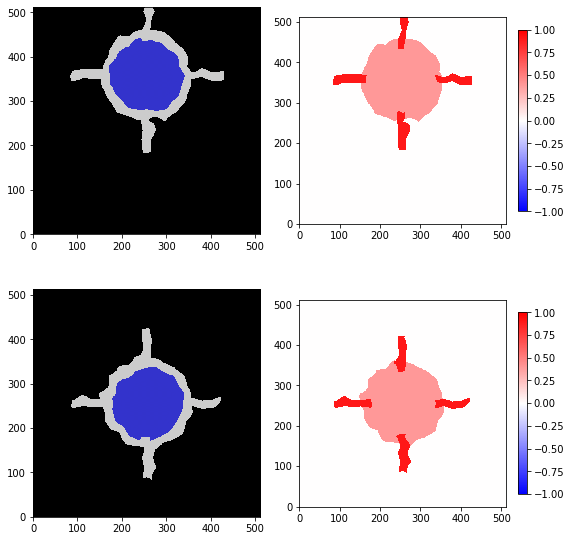

In [9]:
color_setting = {
    'border': np.array([0.8,0.8,0.8]),
    'inner': np.array([0.2,0.2,0.8]),
    'tail': np.array([0.8,0.8,0.8])
}
shape_setting = {
    'radius': 100,
    'vertical_stretch':1.0, # to roughly make ellipse
    'thickness': 20,
    'tail_thickness':20,
    'tail_angles':[0,90.,180.,270.],
    'tail_ratio_to_radius':1.5,
    'd_noise':5.,
    'noise_roughness': 20 # 1 is very fine, pixel level noise
}

cts = CCellTsX()
cts.setup_explanation_attributes(explanation_setting)
cts.setup_basic_ball(color_setting, shape_setting)
ctails1, exp1 = cts.make_tcell(centerpos=(100,0))

cts2 = CCellTsX()
cts2.setup_explanation_attributes(explanation_setting)
cts2.setup_basic_ball(color_setting, shape_setting)
ctails2, exp2 = cts2.make_tcell(centerpos=(0,0))


fig_settings = []
fig_layout = (2,2)
fig_settings.append((fig_layout+(1,), ctails1,'',False))
fig_settings.append((fig_layout+(2,), exp1,'',True))
fig_settings.append((fig_layout+(3,), ctails2,'',False))
fig_settings.append((fig_layout+(4,), exp2,'',True))
create_multi_axes_figures(fig_settings,figsize=(8,8))